# Setup API client

In [ ]:
!pip install easy-webui-api
import easyai

# create API client

# create API client with custom host, port and https, default sampler, steps.
api = easyai.EasyAPI(host='127.0.0.1', port=443, use_https=False, sampler='Euler a', steps=20)

# optionally set username, password when --api-auth is set on webui.
# api.set_auth('username', 'password')

# list all controlnet models
control_net = easyai.ControlNetInterface(api)
control_net.model_list()

# Create a test image

{'prompt': 'a modern bathroom', 'all_prompts': ['a modern bathroom'], 'negative_prompt': 'longbody, lowres, bad anatomy, extra digit, fewer digits, cropped, worst quality, low quality, out of frame', 'all_negative_prompts': ['longbody, lowres, bad anatomy, extra digit, fewer digits, cropped, worst quality, low quality, out of frame'], 'seed': 2023, 'all_seeds': [2023], 'subseed': 4084468446, 'all_subseeds': [4084468446], 'subseed_strength': 0.0, 'width': 512, 'height': 512, 'sampler_name': 'Euler a', 'cfg_scale': 7.0, 'steps': 20, 'batch_size': 1, 'restore_faces': False, 'face_restoration_model': None, 'sd_model_hash': 'e6415c4892', 'seed_resize_from_w': 0, 'seed_resize_from_h': 0, 'denoising_strength': 0.7, 'extra_generation_params': {}, 'index_of_first_image': 0, 'infotexts': ['a modern bathroom\nNegative prompt: longbody, lowres, bad anatomy, extra digit, fewer digits, cropped, worst quality, low quality, out of frame\nSteps: 20, Sampler: Euler a, CFG scale: 7.0, Seed: 2023, Size: 5

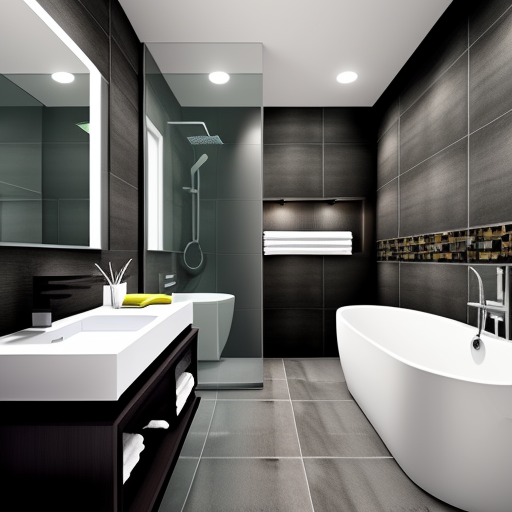

In [5]:
result1 = api.txt2img(
    prompt="a modern bathroom",
    negative_prompt="longbody, lowres, bad anatomy, extra digit, fewer digits, cropped, worst quality, low quality, out of frame",
    seed=2023,
    cfg_scale=7,
)
# images contains the returned images (PIL images)
result1.images

# info contains text info about the api call
print(result1.info)

# info contains paramteres of the api call
# print(result1.parameters)

# image is shorthand for images[0]
result1.image


# Controlled Generative API Demo


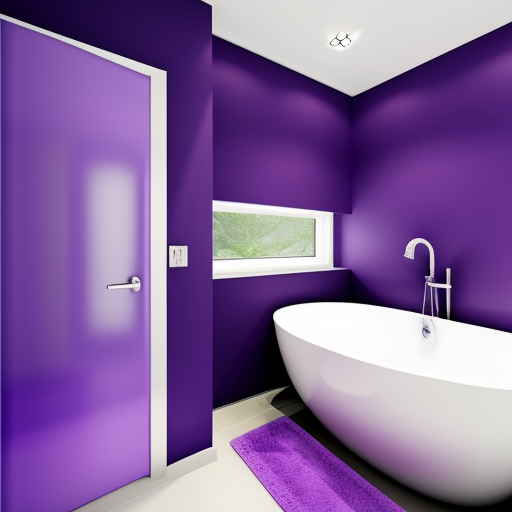

In [6]:
# 生成一个洗手间
r = api.txt2img(
    prompt="a modern bathroom with purple walls",
    negative_prompt="longbody, lowres, bad anatomy, extra digit, fewer digits, cropped, worst quality, low quality, out of frame",
    height=512,
    seed=2023
)

# print(r.info)
img = r.image
img


# Style change

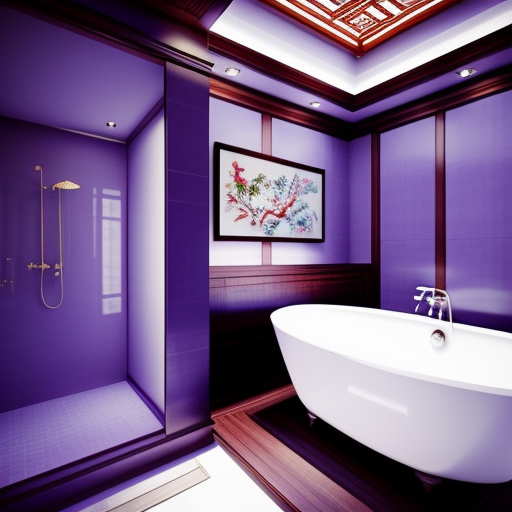

In [7]:
unit1 = easyai.ControlNetUnit(input_image=img, module='canny', model='control_v11p_sd15_canny [d14c016b]')
unit2 = easyai.ControlNetUnit(input_image=img, module='depth', model='control_v11f1p_sd15_depth [cfd03158]', weight=0.5)

# style = "modern"
# style = "minimalist"
# style = "professional"
# style = "tropical"
# style = "vintage"
# style = "industrial"
# style = "neoclassic"
style = "Chinese"


r2 = api.img2img(
    prompt=f"a {style} style bathroom, best quality, photo from Pinterest, interior, cinematic photo, ultra-detailed, ultra-realistic, award-winning, interior design, natural lighting",
    images=[img],
    width=512,
    height=512,
    controlnet_units=[unit1, unit2],
    sampler_name="Euler a",
    cfg_scale=7,
    seed=202304251052
)

# print(r2.info)
new_img = r2.image
new_img

# Upscale demo

In [11]:
result3 = api.extra_single_image(image=new_img,
                                 upscaler_1=api.Upscaler.ESRGAN_4x,
                                 upscaling_resize=2)
print(result3.image.size)
result3.image

AttributeError: 'EasyAPI' object has no attribute 'Upscaler'

# Random style

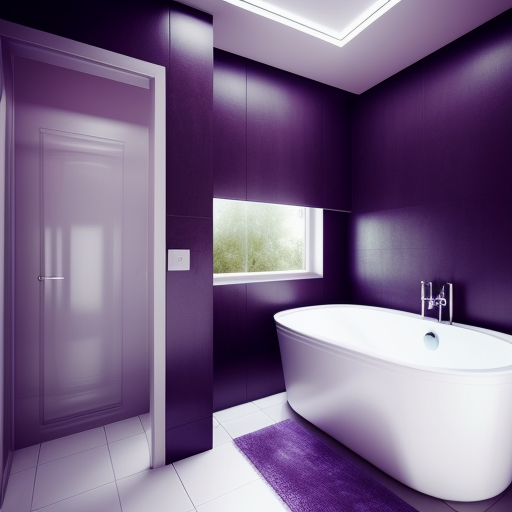

In [12]:
unit1 = easyai.ControlNetUnit(input_image=img, module='canny', model='control_v11p_sd15_canny [d14c016b]')
unit2 = easyai.ControlNetUnit(input_image=img, module='depth', model='control_v11f1p_sd15_depth [cfd03158]', weight=0.5)

r2 = api.img2img(
    prompt="a bathroom, best quality, photo from Pinterest, interior, cinematic photo, ultra-detailed, ultra-realistic, award-winning, interior design, natural lighting",
    images=[img],
    width=512,
    height=512,
    controlnet_units=[unit1, unit2],
    cfg_scale=7,
)

new_img = r2.image

new_img
